## 6.3 볼린저 밴드 지표
**기본 보조지표: 이동평균선, 일목균형표, 볼린저 밴드(bollinger band), 매물대, 상대강도지수RSI, 이동평균 수렴확산 MACD** \
볼린저 밴드: 주가의 변동이 표준 정규분포를 따른다는 가정에서 주가의 위아래에 밴드를 표시, 주가의 상대적인 높낮이 알려줌\
%b, 대역표, 매매기법 파이썬 구현
### 6.3.1 볼린저 밴드
**표준 몰린저 밴드 공식** \
upper = median + 2* stdev \
median = moving average 20day \
lower = median- 2* stdev \
<span style='color:red'>__해석: 통계학에 따른 평균값에서 $\pm$ 2 x stdev 이내에 표본값이 95.4%가 존재하므로, 마찬가지로 주가각 볼린저 밴드 내부에 존재할 확률도 95.4%이다.__</span> \


end_date is initialized to '2025-11-23'


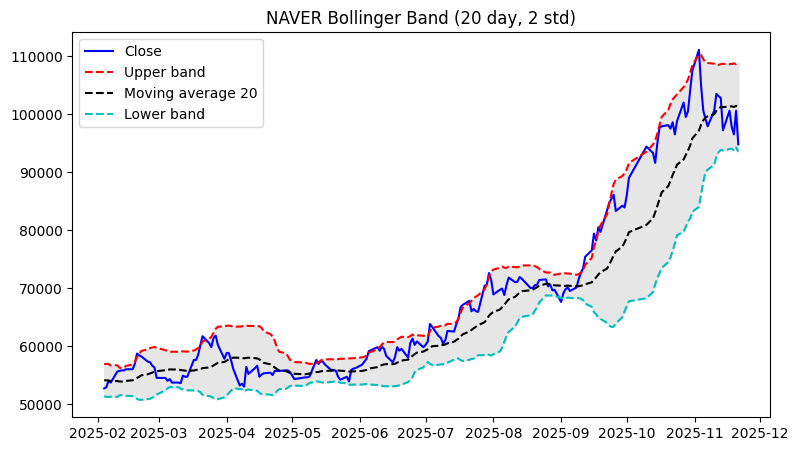

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
#print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df = df[19:]

plt.figure(figsize=(9, 5))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

### 6.3.2 볼린저 밴드 지표 I: %b
주가가 볼린저 밴드 어디에  위치하는지를 나타내는 지표 %b, 종가가 상단 밴드에 걸쳐 있을 때 1.0이 되고, 중간에 걸쳐 있을 때 0.5가 되며, 하단에 걸쳐 있을 때 0.0이 된다.
$$ \%b=\frac{종가-하단볼리저\ 밴드}{상단\ 볼린저\ 밴드 - 하단\ 볼린저\ 밴드}$$
<span style='color:red'>__해석: %b의 그래프는 실제 주가의 흐름과 유사한 모양이다. Gemini에서 다르다고 나옴.__</span>\
아닙니다. %b 지표의 흐름(pattern) 역시 **실제 종가의 흐름(pattern)**과 유사하지 않습니다.\
%b의 패턴은 종가의 절대적 움직임(가격)이나 상대적 움직임(수익률)을 따르는 것이 아니라, 종가가 볼린저 밴드 내에서 차지하는 상대적인 위치에 따라 형성됩니다.\
%b 지표가 중요한 이유는 단순히 주가 흐름을 따라가는 것이 아니라, 가격의 움직임을 변동성의 맥락에서 상대적으로 평가할 수 있게 해주기 때문입니다.\
%b 지표의 중요성은 주로 다음과 같은 분석에 활용되기 때문입니다.

***%b 지표의 중요성 및 활용***
1. 과매수 및 과매도 상태 파악 (Reversal Signals)\
%b 지표는 주가가 볼린저 밴드의 상한선 또는 하한선에 얼마나 가까이 있는지를 정량적으로 보여주기 때문에, 주가의 과매수(Overbought) 또는 과매도(Oversold) 상태를 판단하는 데 필수적입니다.\
%b > 1.0: 종가가 상한선을 돌파하여 과매수 상태임을 나타냅니다. 이는 추세가 강함을 의미할 수도 있지만, 단기적으로는 **되돌림(Reversal)**이 발생할 가능성이 있음을 경고합니다.\
%b < 0.0: 종가가 하한선을 하회하여 과매도 상태임을 나타냅니다. 이는 단기적으로 **반등(Rebound)**이 발생할 가능성이 높음을 시사합니다.
2. 추세의 강도 및 지속 가능성 확인 (Trend Strength)\
%b는 추세가 얼마나 강하게 유지되고 있는지 판단하는 데 도움을 줍니다.\
강한 상승 추세: %b가 장기간 0.8 이상 (상한선 근처)에 머물러 있다면, 강한 매수세가 지속되고 있음을 의미합니다.\
강한 하락 추세: %b가 장기간 0.2 이하 (하한선 근처)에 머물러 있다면, 강한 매도세가 지속되고 있음을 의미합니다.
3. 다른 지표와의 결합을 통한 매매 신호 포착 (Combining Indicators)\
%b 지표는 단독으로 사용되기보다는 다른 지표와 결합될 때 그 가치가 극대화됩니다. 특히 모멘텀을 측정하는 지표인 만큼, 추세 전환 시점을 정확히 포착하는 데 사용됩니다.\
MFI (Money Flow Index) 또는 RSI (Relative Strength Index)와의 결합: 예를 들어, 주가가 상한선(%b=1.0)을 터치했는데 RSI가 하락 반전한다면, 이는 과매수 상태에서 추세의 모멘텀이 약해지고 있음을 나타내는 강력한 매도 신호로 해석될 수 있습니다.
4. 밴드 폭의 변화를 고려한 분석\
%b는 **변동성(Volatility)** 을 고려한 상대적 위치이기 때문에, 주가가 높고 낮음을 떠나 현재 시장 환경에서 가격의 위치가 얼마나 극단적인지를 직관적으로 파악하게 해줍니다. 이는 단순한 종가 비교로는 알 수 없는 중요한 정보입니다.
## 6.3.3 볼린저 밴드 지표 II: 밴드폭
$$bandwidth = \frac{상단볼린저밴드 - 하단볼린저밴드}{중간볼린저밴드} $$
볼린저 밴드에서 **밴드 폭 (Bandwidth)**은 주가의 **변동성(Volatility)** 을 측정하는 핵심 지표이기 때문에 매우 중요합니다. 밴드 폭의 변화는 추세의 시작이나 종료를 예측하는 중요한 단서를 제공합니다.
1. 변동성 측정 및 시장 국면 파악\
밴드 폭이 넓은지 좁은지를 통해 현재 시장이 고변동성 상태인지 저변동성 상태인지를 즉각적으로 판단할 수 있습니다.\
좁은 밴드 폭 (수축): 시장 참여자들이 현재 가격에 대해 의견 일치를 보이고 있으며, 변동성이 낮은 **휴지기(Consolidation)** 나 횡보장임을 의미합니다.\
넓은 밴드 폭 (확장): 주가 움직임이 크고 변동성이 높아졌으며, 강한 추세가 진행 중이거나 곧 가격 급변이 있었음을 의미합니다.
2. Squeeze: 추세 시작의 예고 (낮은 변동성 -> 높은 변동성)\
밴드 폭이 극도로 좁아지는 현상을 **볼린저 스퀴즈(Bollinger Squeeze)** 라고 합니다. 이는 트레이딩에서 가장 중요한 신호 중 하나입니다.\
의미: 밴드 폭이 좁아졌다는 것은 변동성이 매우 낮아졌으며, 이는 곧 큰 움직임이 임박했음을 암시합니다.\
활용: 스퀴즈 이후 상한선이나 하한선을 돌파하는 방향으로 새로운 강한 추세가 시작될 가능성이 높습니다. 트레이더들은 이 시점을 포지션 진입 시점으로 주시합니다.
3. Bulge: 추세 과열 및 종료 예고 (높은 변동성 -> 낮은 변동성)\
밴드 폭이 지나치게 넓어진 후 정점에 도달하는 현상을 의미합니다.\
의미: 밴드 폭이 비정상적으로 넓어졌다는 것은 가격의 움직임이 과열되었음을 나타내며, 현재의 강한 추세가 에너지 소진 단계에 접어들어 곧 변동성이 줄어들며 추세가 약화되거나 반전될 수 있음을 시사합니다.\

밴드 폭($\text{Bandwidth}$)이 얼마나 좁아질지에 대한 정확한 절대값 기준은 없습니다. 시장과 종목마다 변동성 수준이 다르기 때문입니다.하지만, **볼린저 스퀴즈(Bollinger Squeeze)** 를 판단하고 임박한 큰 움직임을 예측하기 위해 밴드 폭이 "충분히 좁아졌는지"를 파악하는 상대적인 방법들이 있습니다.

밴드 폭 수축 판단 기준 (Squeeze 판단)밴드 폭의 수축 정도를 판단하는 데는 주로 다음 두 가지 방법이 사용됩니다.\
- 과거 대비 상대적 비교가장 일반적이고 실용적인 방법은 현재의 밴드 폭을 과거의 밴드 폭과 비교하는 것입니다.\
   판단 기준: 현재 밴드 폭이 최근 N개월(예: 6개월 또는 1년) 동안 가장 좁은 수준에 도달했는지 확인합니다.\
   활용: 만약 현재 밴드 폭이 최근 1년 중 가장 낮은 5% 이내에 있다면, 이는 변동성이 극도로 낮아진 상태(Extreme Low Volatility)로 해석되며, 볼린저 스퀴즈가 발생했다고 판단합니다.\
   지표 사용: 밴드 폭을 나타내는 $\text{Bandwidth}$ 지표 자체를 차트에 추가하고, 그 지표의 과거 최저점을 확인하거나 이동평균선과 비교하여 현재 수준의 수축 정도를 파악합니다.

<span style='color:red'> * Keltner Channel (켈트너 채널)과의 비교볼린저 밴드의 창시자인 존 볼린저(John Bollinger)는 밴드 폭의 수축을 판단하는 가장 정밀한 방법으로 **켈트너 채널(Keltner Channel)** 과의 비교를 제시했습니다.\
   켈트너 채널이란? 볼린저 밴드와 유사하게 중심선(이동평균선)과 상/하한선으로 구성되지만, 밴드의 폭을 **ATR (Average True Range, 평균 실제 거래 범위)** 이라는 변동성 지표를 기반으로 계산합니다.\
   스퀴즈 발생 신호: 볼린저 밴드가 켈트너 채널의 내부로 들어가는 시점을 스퀴즈가 발생한 시점으로 간주합니다.\
   켈트너 채널의 폭이 볼린저 밴드의 폭보다 넓어졌다는 것을 의미하며, 이는 주가의 변동성이 일반적인 범위($K \times \text{StDev}$)보다 훨씬 더 낮아졌다는 매우 강력한 신호로 해석됩니다.</span>
   
**중요한 유의사항**\
스퀴즈는 방향을 알려주지 않습니다: 밴드 폭이 좁아지는 것은 큰 움직임이 임박했음을 알려줄 뿐, 주가가 위로 돌파할지(상승 추세 시작) 아래로 돌파할지(하락 추세 시작)는 알려주지 않습니다. \
돌파 확인이 필수: 트레이더들은 밴드 폭이 좁아진 후, 종가가 상한선 또는 하한선을 돌파하는 것을 확인한 후에야 그 방향으로 포지션을 진입하는 것이 일반적입니다.

end_date is initialized to '2025-11-23'


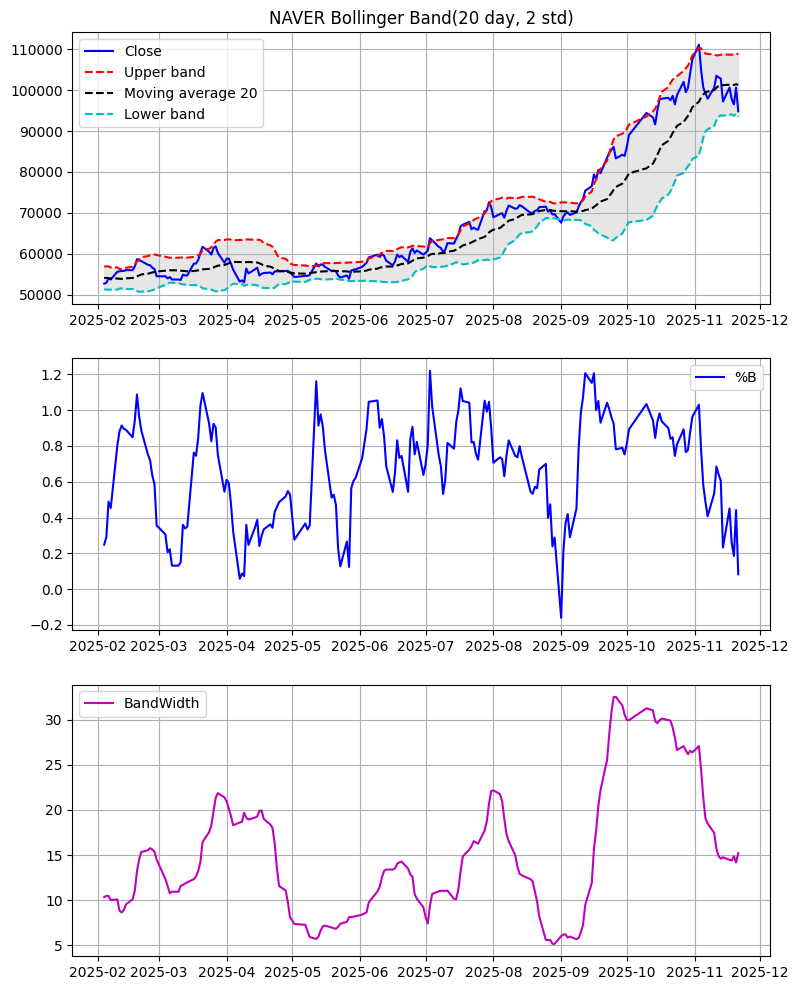

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
#print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
df = df[19:]

plt.figure(figsize=(9, 12))
plt.subplot(3, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 6.4 볼린저 밴드 매매기법
앞에서 살펴본 %b는 볼린저 밴드 어디에 주가가 위치하는지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 때 필요한 핵심 수단이다.\
밴드폭은 밴드의 너비를 수치로 나타낸 것으로 추세의 시작과 끝을 포착하는 역할을 한다. 변동성과 추세는 볼린저 밴드를 구축할 때 이미 반영되었으므로 두가지를 주가의 움직임을 확증하는 근거로 삼으면 안된다. 확증에 활용할 지표들은 범주별로 한씩만 고르면 된다.\
이 책에서는 추세추종과 반전 두 매매기법을 파이썬으로 구현한다.
### 6.4.1 볼린저 밴들를 이용한 추세 추종 매매 기법
추세 추종 trend following 은 상상 추세에 매수하고 하락 추세에 매도하는 기법이다. 현금흐름지표 MFI 나 일중강도 II 같은 거래량 관련 지표를 할께 이용해 확증이 이루어진 경우에만 매수/매도에 들어간다.\
<span style='color:red'>* 매수: 주가가 상단밴드에 접근하며, 지표가 강세를 확증할 때만 매수, %b가 0.8보다 크고, MFI가 80보다 클 때 </span>\
<span style='color:red'>* 매도: 주가가 하단밴드에 접근하며, 지표가 약세를 확증할 때만 매도, %b가 0.2보다 작고, MFI가 20보다 작을 때 </span>
#### MFI 현금흐름지표 Money Flow Index
일반적으로 주가를 나타낼 때 종가를 사용하지만, 중심가격 Typical price을 사용하면 트레이딩이 집중적으로 발생하는 주가 지점을 더 잘 나타낼 수 있다.\
**중심가격 일정기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 값이다.**\
**Money flow 현금 흐름은 중심가격 x 거래량을 곱한 값**\
거래량 지표들은 일반적으로 주가에 선행한다는 특징이 있다. FMI는 거래량 데이터에 상대강도지수 **RSI(relative strength index) 개념을 도입한 지표**\
**RSI가 n일 동안의 상승일 상승폭 합과 하락일 하락푝 합계**를 이용하듯이, **MFI도 이와 유사하게 상승일 동안의 현금 흐름의 합(긍정적 현금흐름)과 하락일 동안의 현금 흐름의 합(부정적 현금흐름)을 이용한다.**
$$MFI=100 - ( 100 \div(1+\frac{긍정적 현금흐름}{부정적 현금흐름})) $$
* 긍정적현금흐름: 중심가격이 전일보다 상승한 날들의 현금 흐름의 합
* 부정적현금흐름: 중심가격이 전일보다 하락한 날들의 현금 흐름의 합

**매수신호가 연달아 나오면 매수**\
표 번주별 기술적 지표
|범주|기술적지표|
|---|---|
|모멘텀|변화율, 스토캐스틱|
|추세|선형회귀, MACD|
|거래량|일중강도(II), 매집/분산(A/D), 현금흐름지표(MFI), 거래량가중 MACD|
|과매수/과매도|CCI, RSI|
|심리|여론조사선, 폿-콜 비율|

end_date is initialized to '2025-11-23'


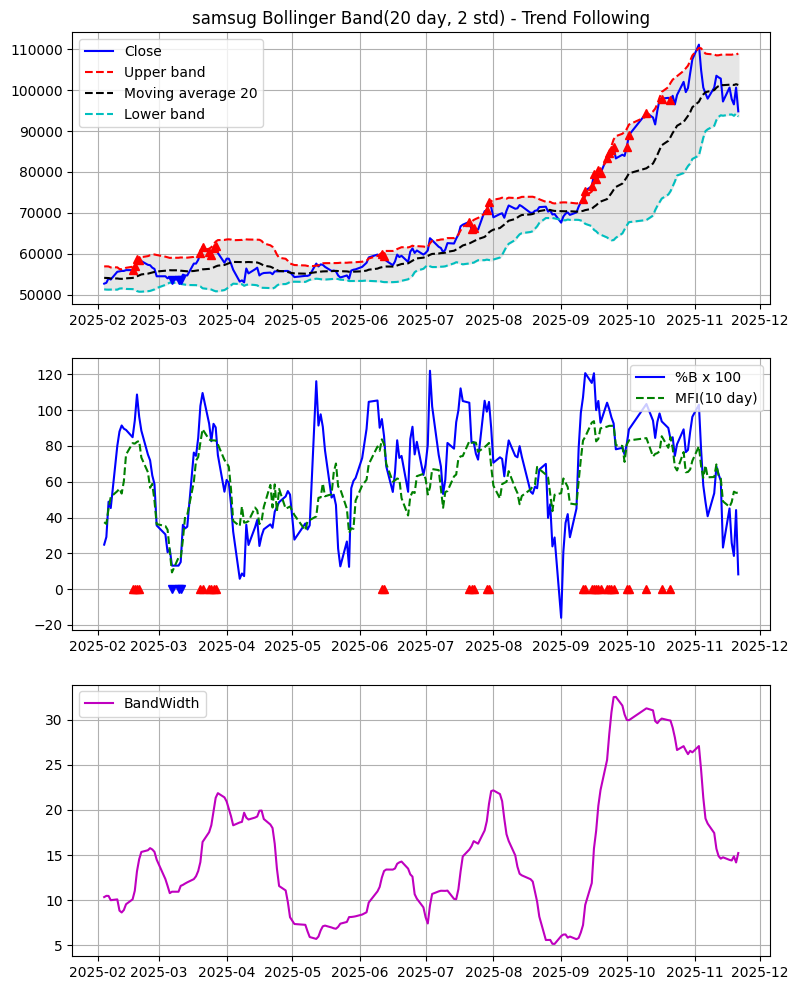

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
#print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100

df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

df = df[19:]

plt.figure(figsize=(9, 12))
plt.subplot(3, 1, 1)
plt.title('samsug Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')

plt.show()


### 6.4.2 볼린저 밴드를 이용한 반전 매매기법
Reversals, 반전매매기법, 주가가 반전하는 지점을 찾아내 매수 매도하는 기법\
일중 강도율 Intraday Intensity %, 매집분산율 AD%
* 매수: 주가가 하단 밴드 부근에서 W형 패턴을 나타내고, 강세지표가 확증할 때 매수(%b가 0.05보다 작고 II%가 0보다 크면 매수
* 매도: 주가가 상단 밴드 부근에서 일련의 주가 태그가 일어나며, 약세지표가 확증할 때 매수(%b가 0.95보다 작고 II%가 0보다 작으면 매도

### 일중강도
데이빗 보스티언 David Bostian\
거래 범위에서 종각의 위치를 토대로 주식 종목의 자금흐름을 설명한다. II는 장이 끝나는 시점에서 트레이더들의 움직임을 나타내는데, 종가가 거래 범위 천정권에서 형성되면 1, 중간에서 형성되면 0, 바닥권에서 형성되면 -1이 된다.\
21일 기간 동안의 II 합을 21일 기간 동안의 거래량 합으로 나누어 표준화한 것이 일중 강도율 Intraday intensity %, II%이다.\
$$일중강도=\frac{2 * 종가-고가-저가}{고가-저가}*거래량 $$
$$일중강도율=\frac{일중강도의 21일합}{거래량의 21일 합}*100 $$

end_date is initialized to '2025-11-23'


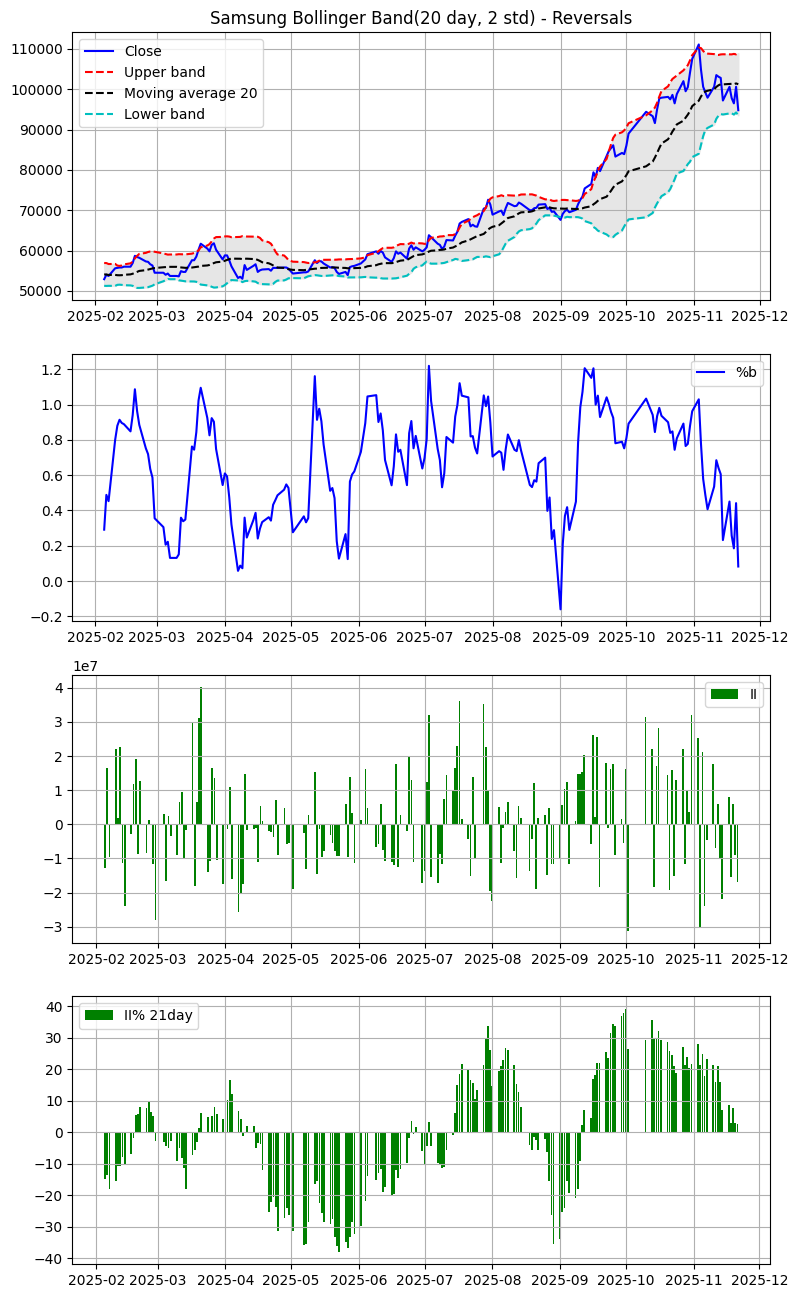

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']  # ①
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100  # ②
df = df.dropna()

plt.figure(figsize=(9, 16))
plt.subplot(4, 1, 1)
plt.title('Samsung Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(4, 1, 3)  # ③
plt.bar(df.index, df['II'], color='g', label='II')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(4, 1, 4)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # ④
plt.grid(True)
plt.legend(loc='best')

plt.show()

end_date is initialized to '2025-11-23'


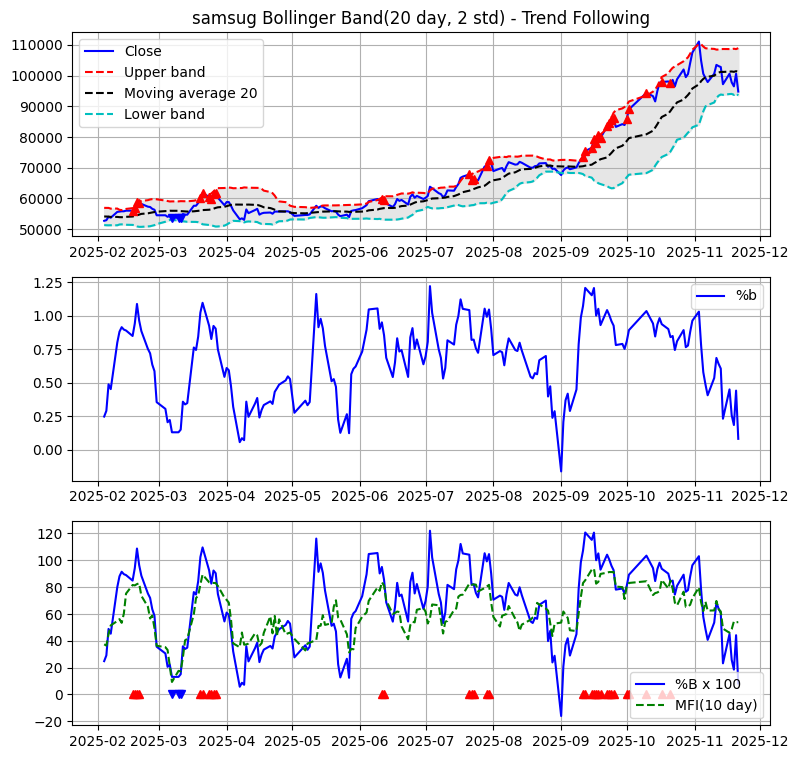

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
#print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100

df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

df = df[19:]

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('samsug Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')

plt.show()


end_date is initialized to '2025-11-23'


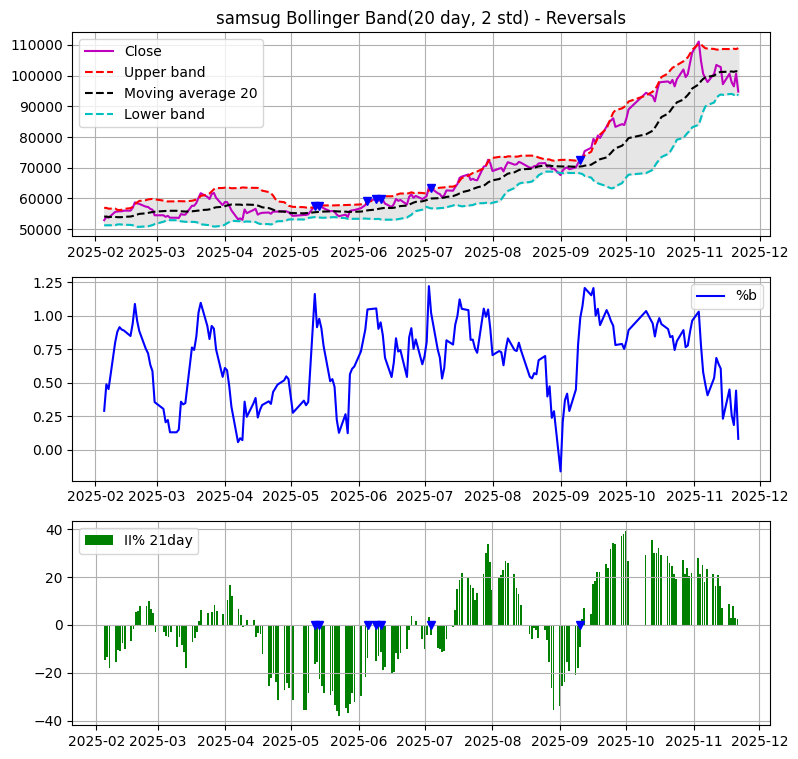

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('samsug Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')

plt.show()


### important
추세 주종(Trend Following) vs. 반전 매매(Reversal Trading) 기법\
네, 맞습니다. 추세 추종 매매 기법과 반전 매매 기법은 접근 방식과 매수/매도 시점이 거의 반대입니다.\
두 기법이 지향하는 시장 상황과 투자 결정 기준을 비교하면 다음과 같습니다.\
1. 추세 추종 기법 (Trend Following)
   추세 추종은 현재 진행 중인 시장의 방향에 올라타는 전략입니다.\
   기본 철학: 주가는 한번 방향을 잡으면 관성을 유지하려는 경향이 있다 (추세 지속).\
   매수 시점 (롱 포지션):상승 추세가 확인된 시점 (예: 이동평균선이 정배열되거나 돌파되는 시점)에 매수합니다.이미 주가가 오르고 있는 상황에서 더 오를 것을 기대하고 진입합니다.\
   매도 시점 (청산/숏 포지션):추세가 꺾이기 시작하는 시점 (예: 이동평균선을 하향 이탈)에 청산하거나 숏 포지션(매도)을 잡습니다.\
   활용 지표: 이동평균선(MA), $\text{ADX}$ (평균 방향성 지수), $\text{MACD}$ 등\
       예시: 주가가 $\text{20}$일 이동평균선 위에서 꾸준히 상승할 때 매수하고, $\text{20}$일 이동평균선을 하향 이탈할 때 매도합니다.
2. 반전 매매 기법 (Reversal Trading)
   반전 매매는 현재 진행 중인 추세가 곧 끝날 것이라고 예측하고 그 반대 방향에 미리 진입하는 전략입니다.\
   기본 철학: 주가는 과도하게 오르거나 내린 후에는 평균으로 회귀하려는 경향이 있다 (과매수/과매도 해소).\
   매수 시점 (롱 포지션):주가가 과도하게 하락하여 과매도 상태에 진입했다고 판단될 때 매수합니다. 더 이상 하락하기 어렵다고 예상되는 시점에 미리 진입합니다.\
   매도 시점 (청산/숏 포지션):주가가 과도하게 상승하여 과매수 상태에 진입했다고 판단될 때 매도(청산 또는 숏 포지션)합니다. 더 이상 상승하기 어렵다고 예상되는 시점에 진입합니다.\
   활용 지표: $\text{RSI}$ (상대 강도 지수), 스토캐스틱, 볼린저 밴드($\%b$ 지표), 일중강도율($\text{II}\%$) 등\
       예시: $\text{RSI}$가 $\text{30}$ 이하로 떨어져 과매도 상태일 때 매수하고, $\text{70}$ 이상으로 올라 과매수 상태일 때 매도합니다.
결론적으로, 추세 추종은 '움직임이 확인된 후' 따라가는 전략인 반면, 반전 매매는 '움직임이 멈추거나 과도할 때' 역방향을 예측하는 전략이므로, 매매 시점과 시장 접근법이 근본적으로 반대라고 할 수 있습니다.

**비교**
|구분|추세 추종 (Trend Following)|반전 매매 (Reversal Trading)|
|---|---|---|
|매수 (롱) 시점|상승 추세가 시작될 때 또는 진행 중일 때(비쌀 때 사서 더 비싸게 팔기 기대)|하락 추세의 끝 지점 또는 과매도 영역일 때 (쌀 때 사서 반등을 기대)|
|매도 (숏) 시점|하락 추세가 시작될 때 또는 진행 중일 때|상승 추세의 끝 지점 또는 과매수 영역일 때|
|주요 리스크|거짓 추세(False Breakout)에 속아 손실 발생|추세가 예상보다 오래 지속되어(추가 하락/상승) 손실 발생|

end_date is initialized to '2025-11-26'


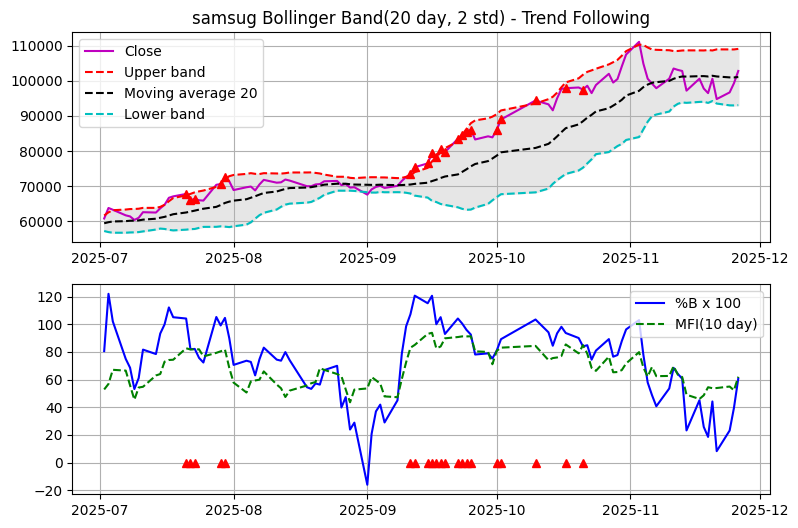

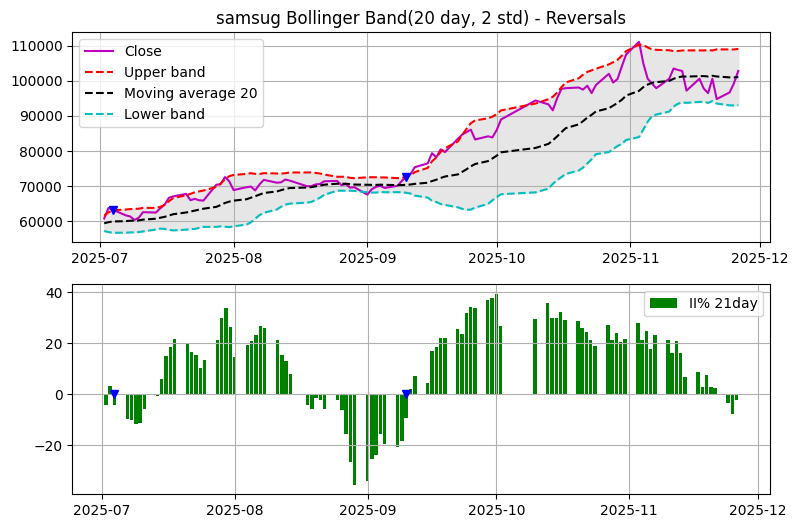

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price('삼성전자', '2025-05-02')
#print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100

df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

df = df[19:]

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.title('samsug Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='m', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.title('samsug Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()